In [185]:
#Import Modules
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import statistics as sts
import matplotlib.pyplot as plt

# HEART DISEASE PREDICTION

In [186]:

#Import the dataset
df=pd.read_csv(r"C:\Users\user\Downloads\framingham.csv")
 
df.head()

,id,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,2,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,3,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,4,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,5,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [187]:
#Total number of nulls per column
df.isnull().sum()

id                   0
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [188]:
# View whole Dataset
df


,id,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,2,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,3,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,4,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,5,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4234,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,4235,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,4236,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,4237,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [189]:
#Show the datatypes in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4238 non-null   int64  
 1   male             4238 non-null   int64  
 2   age              4238 non-null   int64  
 3   education        4133 non-null   float64
 4   currentSmoker    4238 non-null   int64  
 5   cigsPerDay       4209 non-null   float64
 6   BPMeds           4185 non-null   float64
 7   prevalentStroke  4238 non-null   int64  
 8   prevalentHyp     4238 non-null   int64  
 9   diabetes         4238 non-null   int64  
 10  totChol          4188 non-null   float64
 11  sysBP            4238 non-null   float64
 12  diaBP            4238 non-null   float64
 13  BMI              4219 non-null   float64
 14  heartRate        4237 non-null   float64
 15  glucose          3850 non-null   float64
 16  TenYearCHD       4238 non-null   int64  
dtypes: float64(9),

In [190]:
#Show the dataset info 
df.describe()

,id,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,2119.500000,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,1223.549549,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,1.000000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,1060.250000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,2119.500000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,3178.750000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,4238.000000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [191]:
df

,id,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,2,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,3,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,4,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,5,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4234,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,4235,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,4236,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,4237,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [192]:
# Replace nulls with Mode, mean and median
df['education'].fillna(df['education'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mode(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode(), inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)

In [193]:
#Remove all nulls 
df.dropna(inplace=True)

In [194]:
df.isnull().sum()

id                 0
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

0    25.802008
Name: BMI, dtype: float64


0    0.0
Name: cigsPerDay, dtype: float64


array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'male'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'education'}>],
       [<AxesSubplot: title={'center': 'currentSmoker'}>,
        <AxesSubplot: title={'center': 'cigsPerDay'}>,
        <AxesSubplot: title={'center': 'BPMeds'}>,
        <AxesSubplot: title={'center': 'prevalentStroke'}>],
       [<AxesSubplot: title={'center': 'prevalentHyp'}>,
        <AxesSubplot: title={'center': 'diabetes'}>,
        <AxesSubplot: title={'center': 'totChol'}>,
        <AxesSubplot: title={'center': 'sysBP'}>],
       [<AxesSubplot: title={'center': 'diaBP'}>,
        <AxesSubplot: title={'center': 'BMI'}>,
        <AxesSubplot: title={'center': 'heartRate'}>,
        <AxesSubplot: title={'center': 'glucose'}>],
       [<AxesSubplot: title={'center': 'TenYearCHD'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

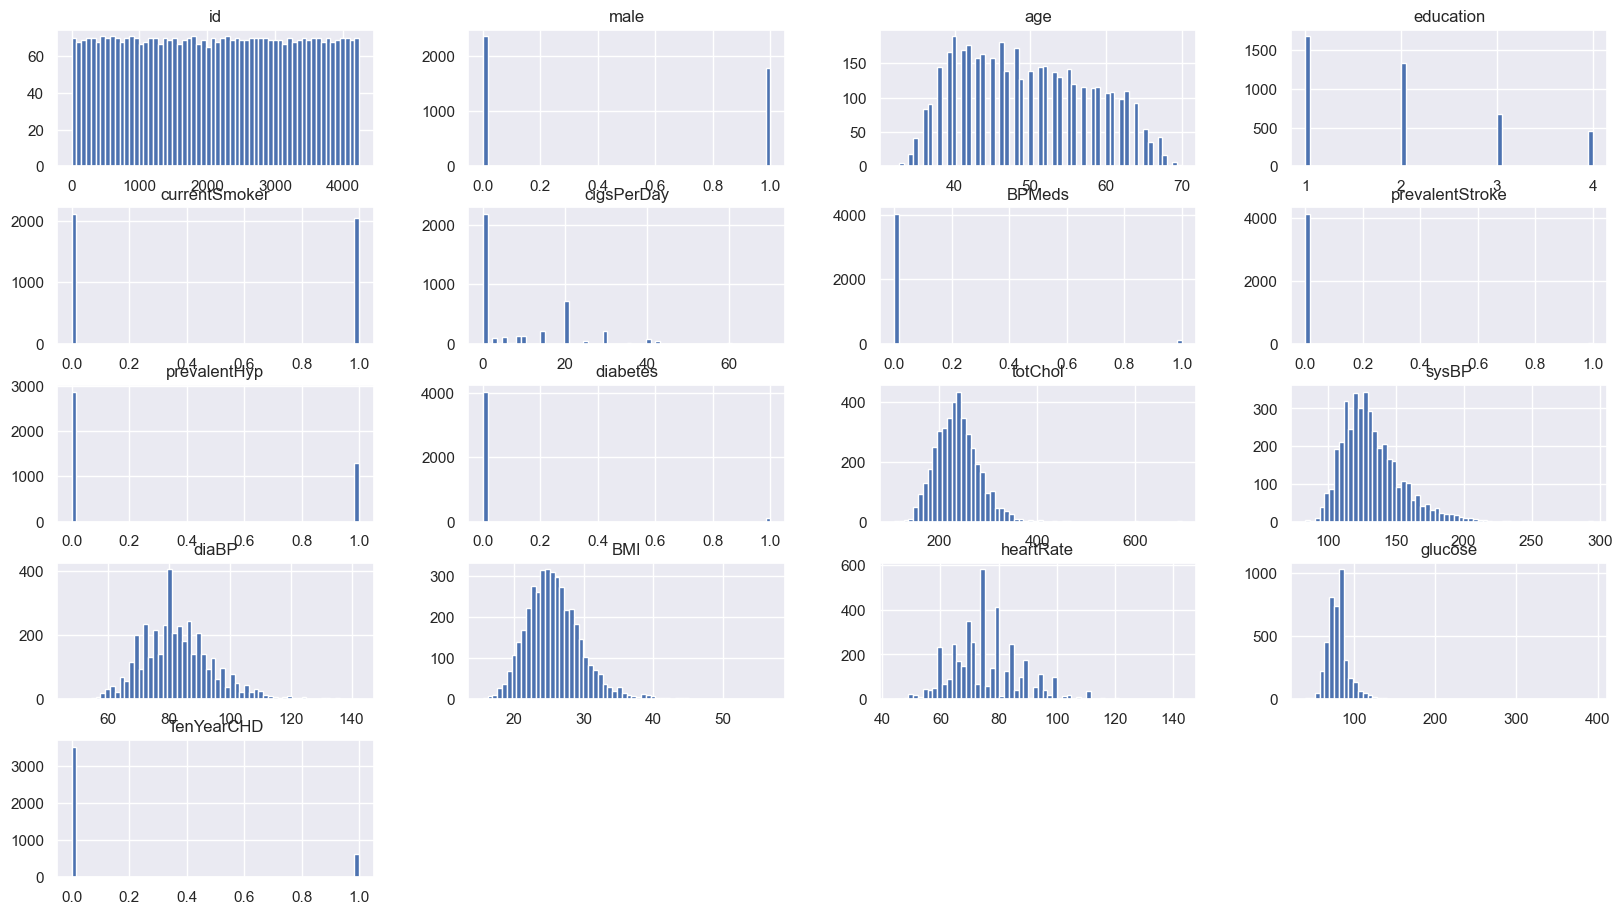

In [195]:
df.hist(bins=60, figsize=(20,11))

In [199]:
tot = df[df['totChol']>300]

<AxesSubplot: xlabel='id', ylabel='totChol'>

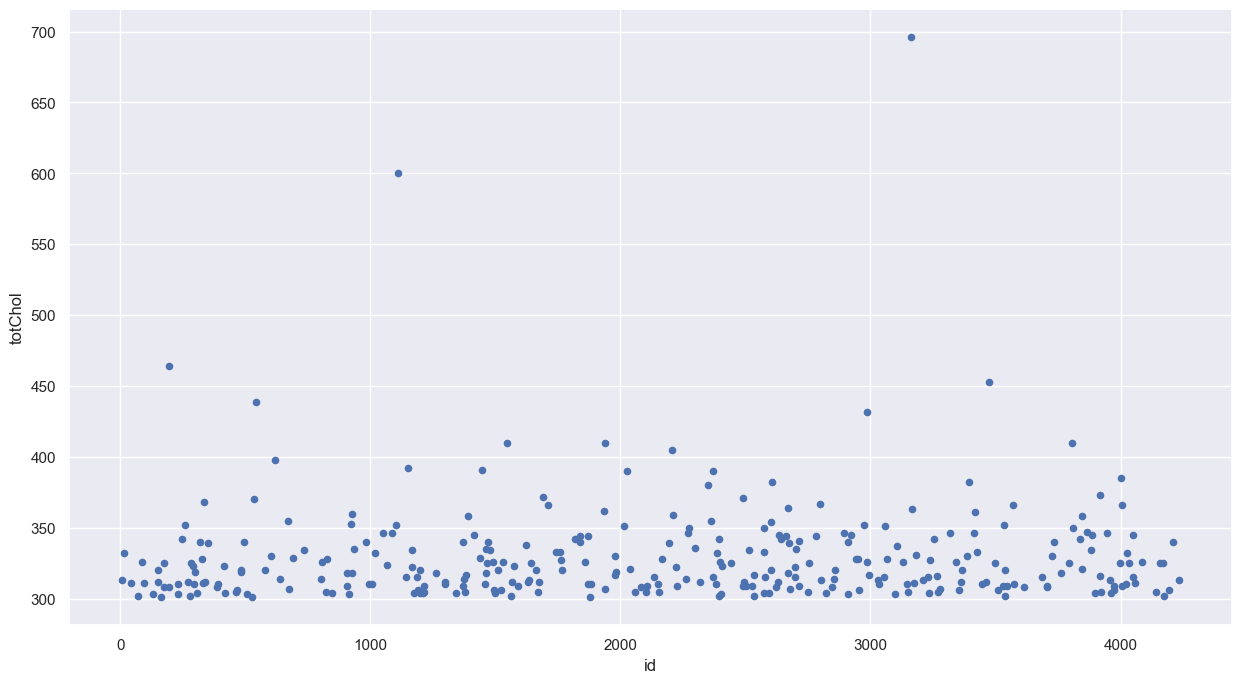

In [200]:
tot[['id', 'totChol']].plot(kind='scatter', x='id', y='totChol')

<AxesSubplot: xlabel='id', ylabel='glucose'>

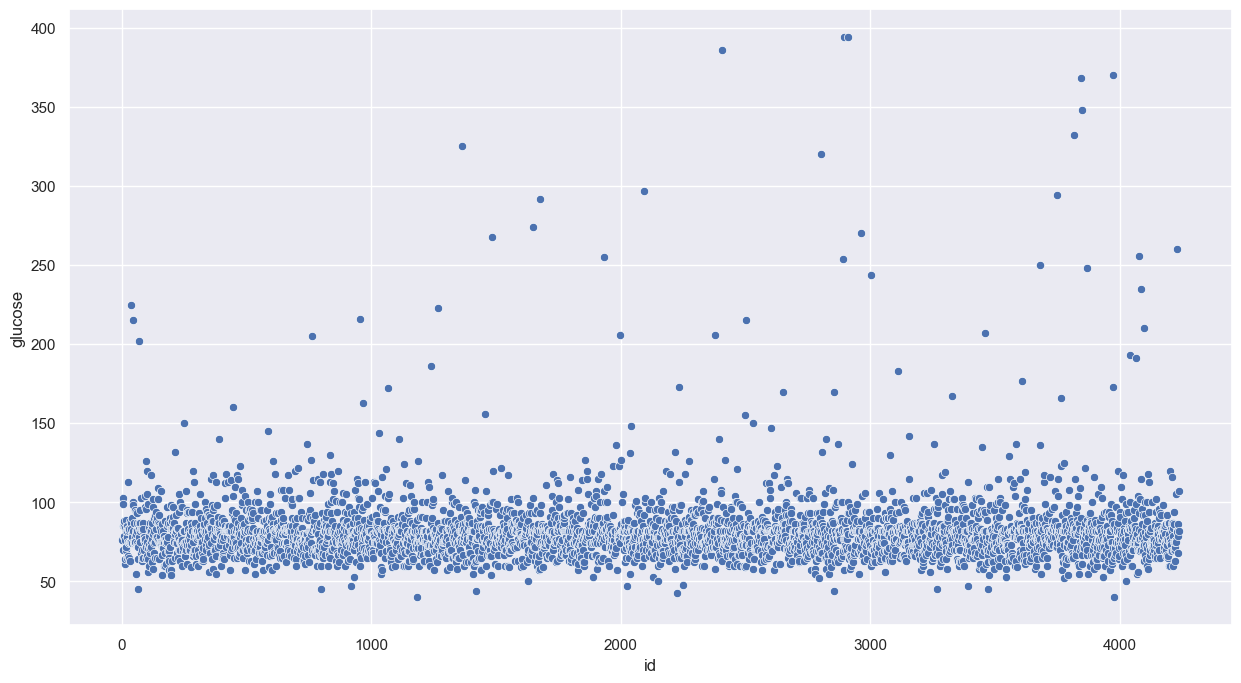

In [201]:
sns.scatterplot(x='id', y='glucose', data=df)

<AxesSubplot: xlabel='id', ylabel='BMI'>

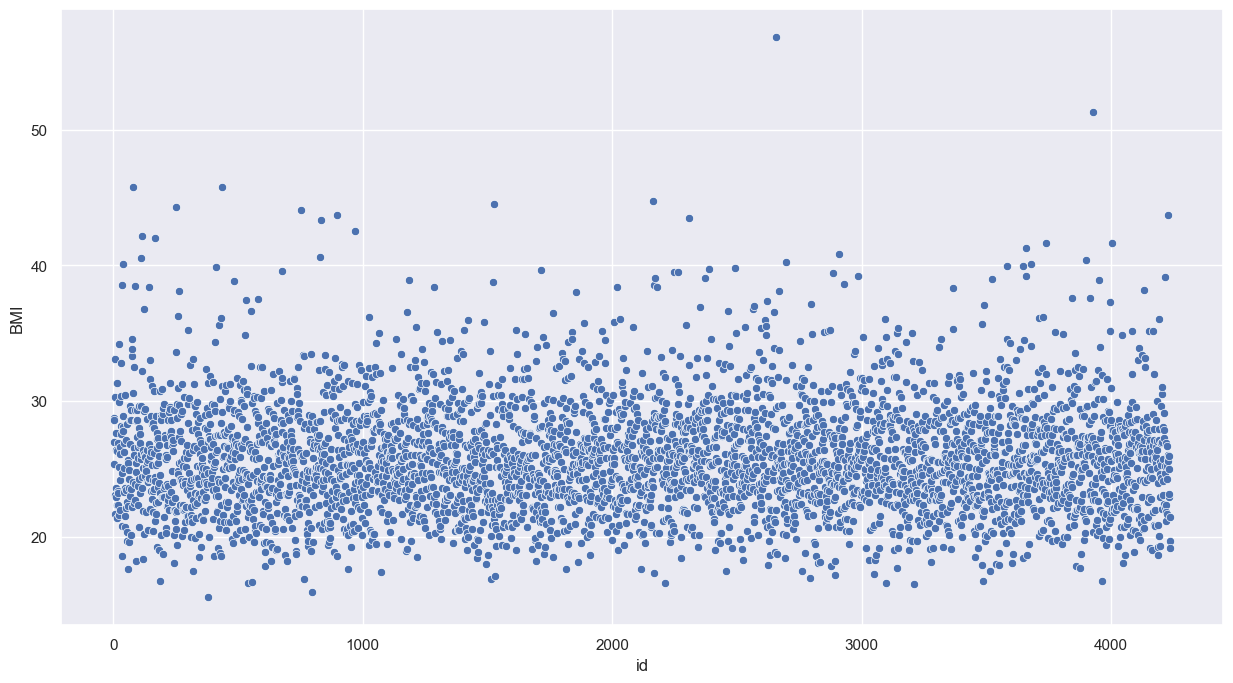

In [202]:
sns.scatterplot(x='id', y='BMI', data=df)

<AxesSubplot: xlabel='id', ylabel='sysBP'>

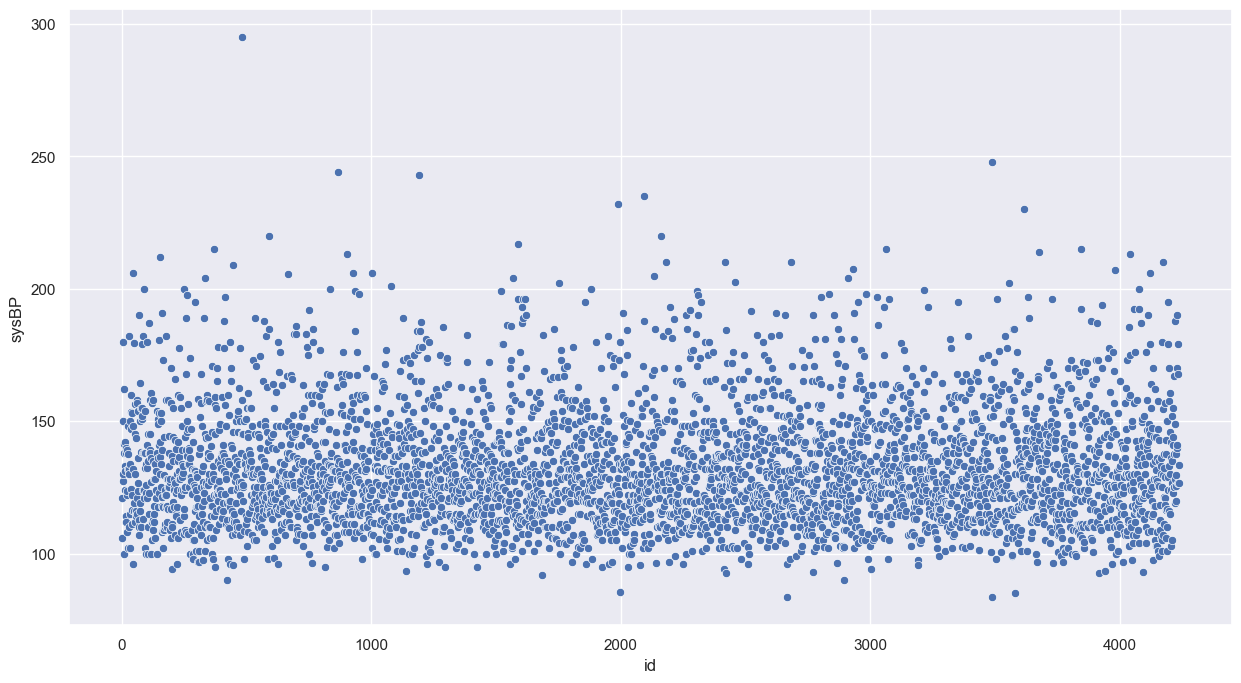

In [204]:
sns.scatterplot(x='id', y='sysBP', data=df)

<AxesSubplot: xlabel='id', ylabel='diaBP'>

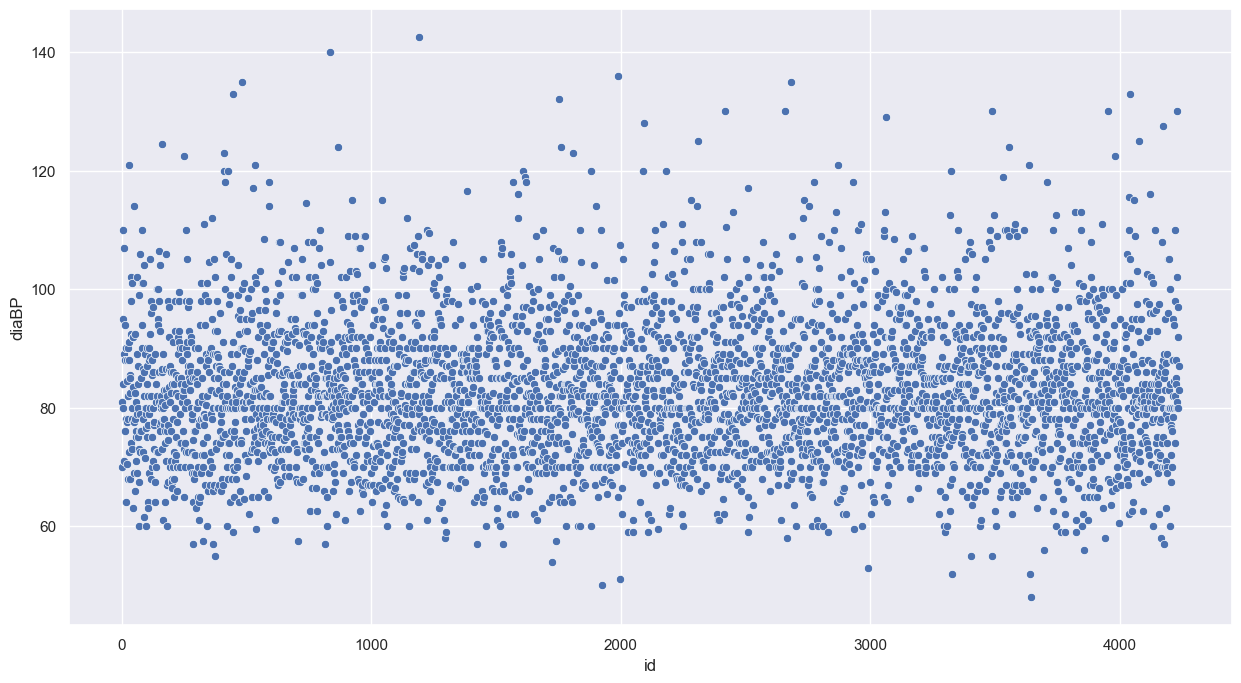

In [205]:
sns.scatterplot(x='id', y='diaBP', data=df)

### Boxplot

In [206]:
# define a function called plot_boxplot
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

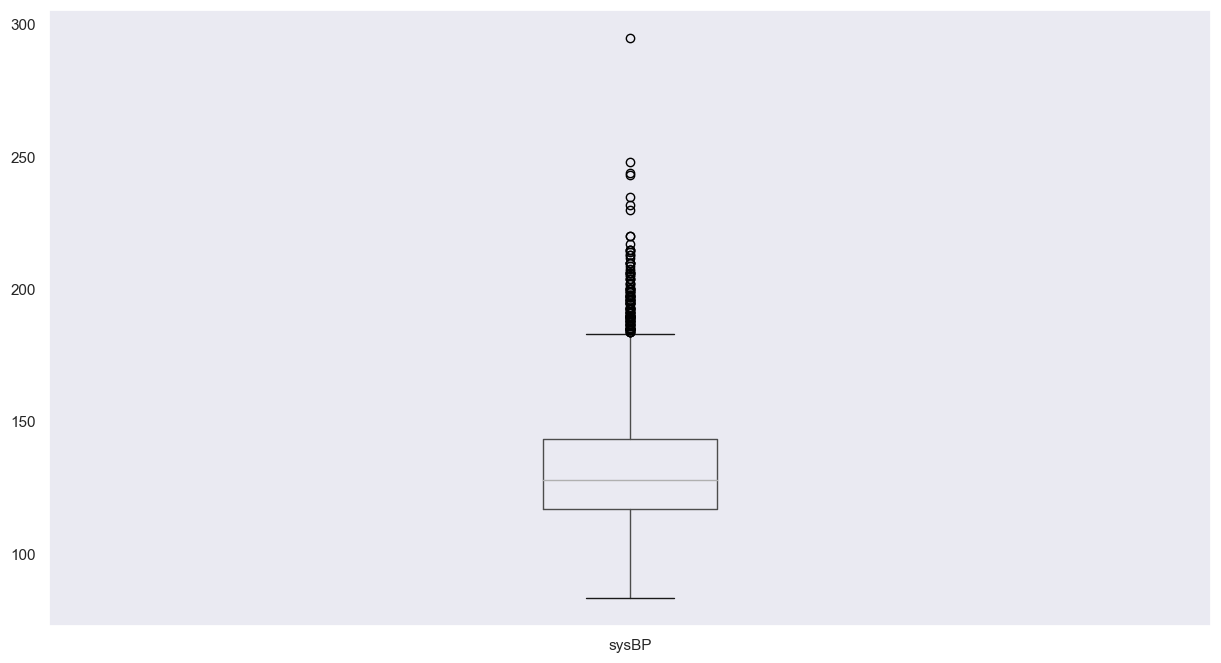

In [207]:
plot_boxplot(df, "sysBP")

In [117]:
#data shape before outliers removed
df.shape

(4155, 17)

### Remove outliers

In [119]:
# define a function called 'outliers' which returns a list of index of outliers
# IQR = Q3 - Q1
# +/- 1.5* IQR
def outliers(df, ft): 
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [121]:
#create an empty list to store the output indices from multiple rows
index_list = []

for feature in ['totChol', 'BMI', 'sysBP', 'diaBP','glucose','diaBP', 'heartRate']:
    index_list.extend(outliers(df, feature))

In [123]:
#define function called remove which returns a cleaned dataset without outliers

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [124]:
df_cleaned_outliers = remove(df, index_list)

In [182]:
df_cleaned_outliers = df_cleaned_outliers.drop(['id'], axis=1)

In [183]:
#Data shape after outliers are removed
df_cleaned_outliers.shape

(3879, 16)

array([[<AxesSubplot: title={'center': 'male'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'education'}>,
        <AxesSubplot: title={'center': 'currentSmoker'}>],
       [<AxesSubplot: title={'center': 'cigsPerDay'}>,
        <AxesSubplot: title={'center': 'BPMeds'}>,
        <AxesSubplot: title={'center': 'prevalentStroke'}>,
        <AxesSubplot: title={'center': 'prevalentHyp'}>],
       [<AxesSubplot: title={'center': 'diabetes'}>,
        <AxesSubplot: title={'center': 'totChol'}>,
        <AxesSubplot: title={'center': 'sysBP'}>,
        <AxesSubplot: title={'center': 'diaBP'}>],
       [<AxesSubplot: title={'center': 'BMI'}>,
        <AxesSubplot: title={'center': 'heartRate'}>,
        <AxesSubplot: title={'center': 'glucose'}>,
        <AxesSubplot: title={'center': 'TenYearCHD'}>]], dtype=object)

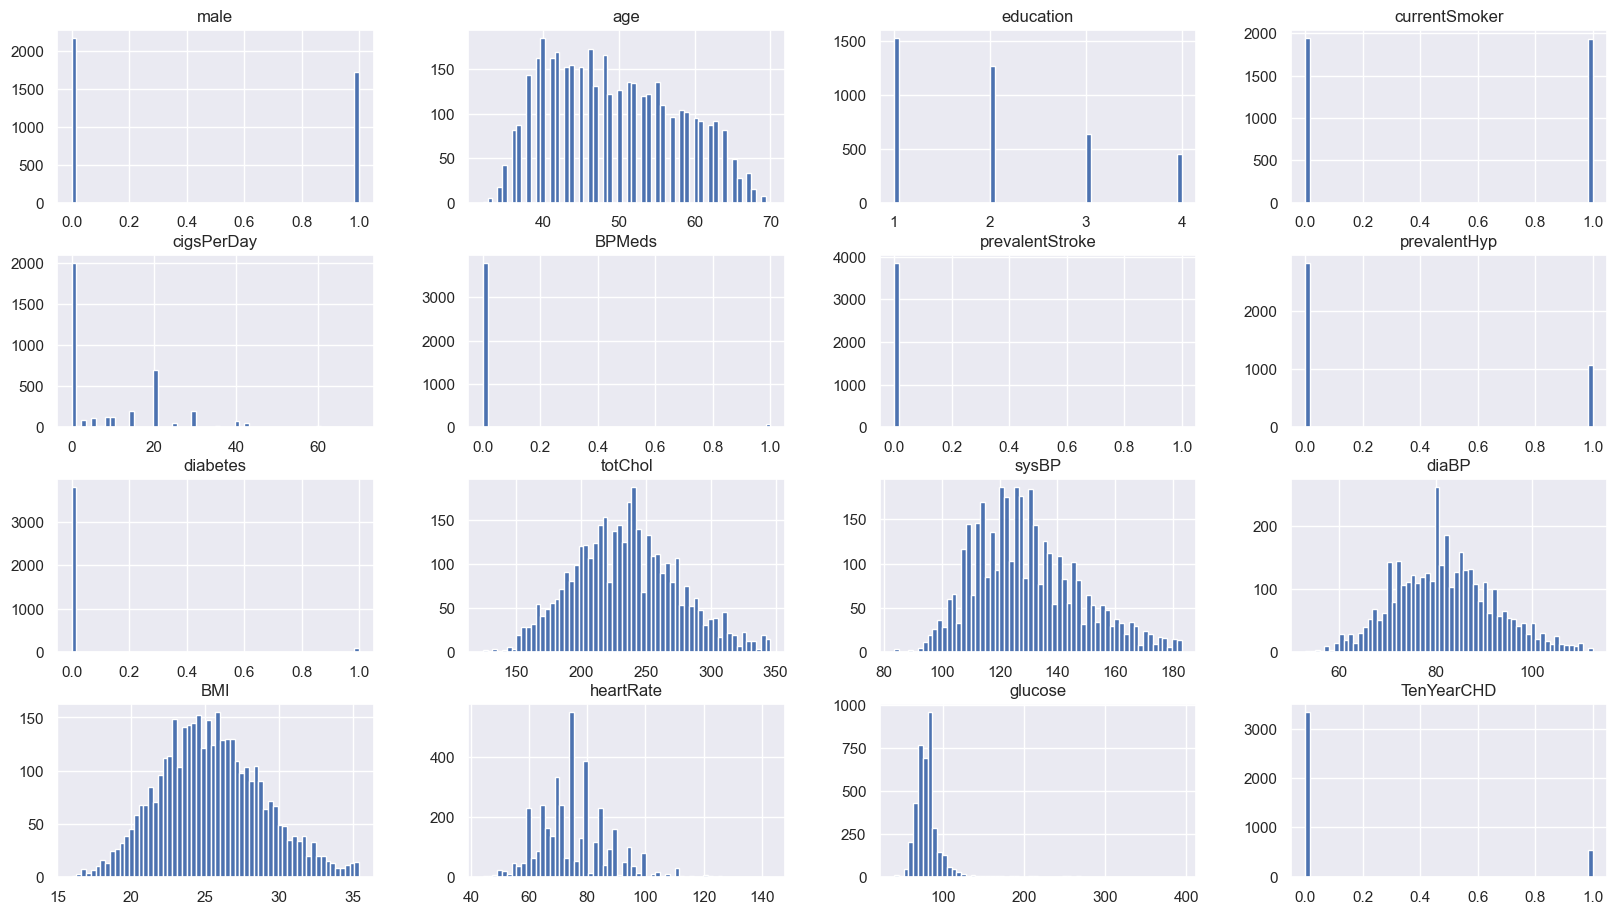

In [184]:
#Histogram of data without outliers
df_cleaned_outliers.hist(bins=60, figsize=(20,11))

In [208]:
df_cleaned_outliers

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.000000,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


In [209]:
#Correlation matrix
df_cleaned_outliers.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.001915,0.000920,0.190494,0.315549,-0.041957,0.008389,0.040010,0.036944,-0.045043,0.018504,0.103344,0.152198,-0.118557,0.022098,0.109848
age,-0.001915,1.000000,-0.149489,-0.201073,-0.177816,0.104224,0.045698,0.280445,0.089047,0.271685,0.371948,0.179085,0.129849,-0.030746,0.100875,0.213756
education,0.000920,-0.149489,1.000000,0.014552,0.002652,0.010395,-0.025039,-0.069514,-0.019369,-0.019735,-0.120561,-0.051777,-0.113327,-0.051461,-0.019102,-0.043951
currentSmoker,0.190494,-0.201073,0.014552,1.000000,0.767417,-0.044196,-0.021430,-0.084195,-0.026067,-0.049523,-0.114800,-0.099809,-0.168688,0.066564,-0.045259,0.033652
cigsPerDay,0.315549,-0.177816,0.002652,0.767417,1.000000,-0.045817,-0.025490,-0.043004,-0.023825,-0.017028,-0.064349,-0.038123,-0.074266,0.074444,-0.045201,0.071033
BPMeds,-0.041957,0.104224,0.010395,-0.044196,-0.045817,1.000000,0.088855,0.241141,0.014375,0.041754,0.194629,0.147996,0.069266,-0.009034,-0.011472,0.053455
prevalentStroke,0.008389,0.045698,-0.025039,-0.021430,-0.025490,0.088855,1.000000,0.068937,0.013812,0.005815,0.063290,0.052739,0.002811,-0.005060,0.017744,0.064426
prevalentHyp,0.040010,0.280445,-0.069514,-0.084195,-0.043004,0.241141,0.068937,1.000000,0.058373,0.141695,0.684727,0.589689,0.251976,0.118935,0.056377,0.148318
diabetes,0.036944,0.089047,-0.019369,-0.026067,-0.023825,0.014375,0.013812,0.058373,1.000000,0.026890,0.072083,0.029911,0.055096,0.043801,0.576434,0.086970
totChol,-0.045043,0.271685,-0.019735,-0.049523,-0.017028,0.041754,0.005815,0.141695,0.026890,1.000000,0.203993,0.185620,0.155836,0.068746,0.032400,0.061571


<AxesSubplot: >

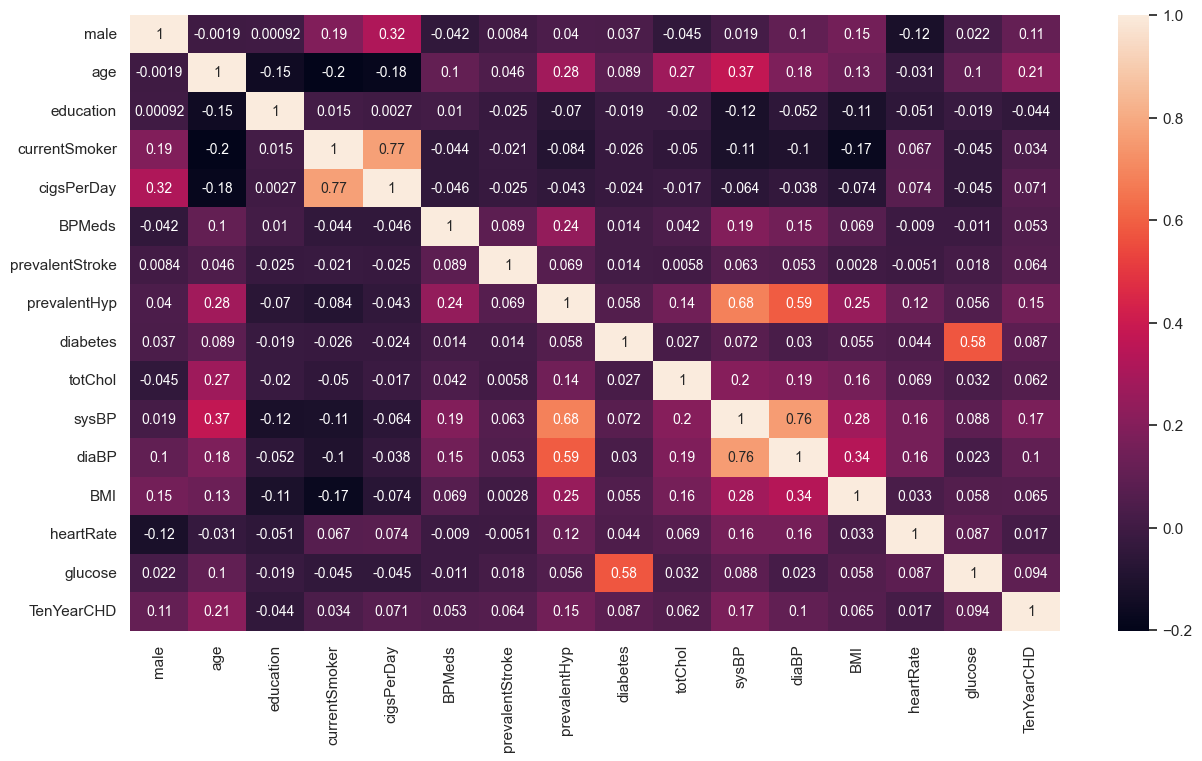

In [210]:
#Correlation matrix heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_cleaned_outliers.corr(),  annot=True, fmt='.2g',annot_kws={'size': 10})

## Train Test Split

In [137]:
X= df_cleaned_outliers.drop("TenYearCHD", axis=1)
y= df_cleaned_outliers["TenYearCHD"]



In [138]:
from sklearn.model_selection import train_test_split

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [140]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

## Logistic Regression

In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix

    
model = LogisticRegression(solver='lbfgs', max_iter=100000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


confusion_matrix(y_test, predictions)

array([[662,   2],
       [106,   6]], dtype=int64)

In [143]:
accuracy_score(y_test, predictions)

0.8608247422680413

## Decision Tree

In [144]:
Treemodel = DecisionTreeClassifier()
Treemodel.fit(X_train, y_train)
Tree_predictions = Treemodel.predict(X_test)

confusion_matrix(y_test, Tree_predictions)

array([[581,  83],
       [ 74,  38]], dtype=int64)

In [145]:
accuracy_score(y_test, Tree_predictions)

0.7976804123711341

## Random Forest

In [146]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# rf.score(X_test,y_test)
confusion_matrix(y_test, rf_predictions)

array([[661,   3],
       [106,   6]], dtype=int64)

In [147]:
accuracy_score(y_test, rf_predictions)

0.8595360824742269